In [1]:
import os
import matplotlib.pyplot as plt
import geopandas as gpd
import earthpy as et

In [2]:
data = et.data.get_data('spatial-vector-lidar')

os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

Extracted output to /home/codespace/earth-analytics/data/spatial-vector-lidar/.


In [5]:
plot_centroid_path = os.path.join("data", "spatial-vector-lidar", 
                                  "california", "neon-sjer-site", 
                                  "vector_data", "SJER_plot_centroids.shp")

sjer_plot_locations = gpd.read_file(plot_centroid_path)

In [6]:
sjer_plot_locations.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Plot_ID    18 non-null     object  
 1   Point      18 non-null     object  
 2   northing   18 non-null     float64 
 3   easting    18 non-null     float64 
 4   plot_type  18 non-null     object  
 5   geometry   18 non-null     geometry
dtypes: float64(2), geometry(1), object(3)
memory usage: 992.0+ bytes


In [7]:
sjer_plot_locations.head(6)

Plot_ID   Point     northing     easting plot_type  \
0  SJER1068  center  4111567.818  255852.376     trees   
1   SJER112  center  4111298.971  257406.967     trees   
2   SJER116  center  4110819.876  256838.760     grass   
3   SJER117  center  4108752.026  256176.947     trees   
4   SJER120  center  4110476.079  255968.372     grass   
5   SJER128  center  4111388.570  257078.867     trees   

                         geometry  
0  POINT (255852.376 4111567.818)  
1  POINT (257406.967 4111298.971)  
2  POINT (256838.760 4110819.876)  
3  POINT (256176.947 4108752.026)  
4  POINT (255968.372 4110476.079)  
5  POINT (257078.867 4111388.570)

In [8]:
sjer_plot_locations.describe()

northing        easting
count  1.800000e+01      18.000000
mean   4.110258e+06  256673.706667
std    1.292474e+03     919.375825
min    4.107527e+06  254738.618000
25%    4.109790e+06  256062.841750
50%    4.110363e+06  256700.450500
75%    4.111242e+06  257190.968750
max    4.112168e+06  258497.102000

In [9]:
type(sjer_plot_locations)

geopandas.geodataframe.GeoDataFrame

In [10]:
sjer_plot_locations.crs

<Projected CRS: EPSG:32611>
Name: WGS 84 / UTM zone 11N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 120°W and 114°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - Alberta; British Columbia (BC); Northwest Territories (NWT); Nunavut. Mexico. United States (USA).
- bounds: (-120.0, 0.0, -114.0, 84.0)
Coordinate Operation:
- name: UTM zone 11N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [11]:
sjer_plot_locations.total_bounds

array([ 254738.618, 4107527.074,  258497.102, 4112167.778])

In [12]:
sjer_plot_locations.shape

(18, 6)

<Axes: >

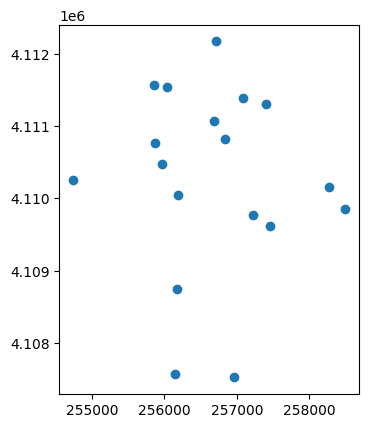

In [13]:
sjer_plot_locations.plot()

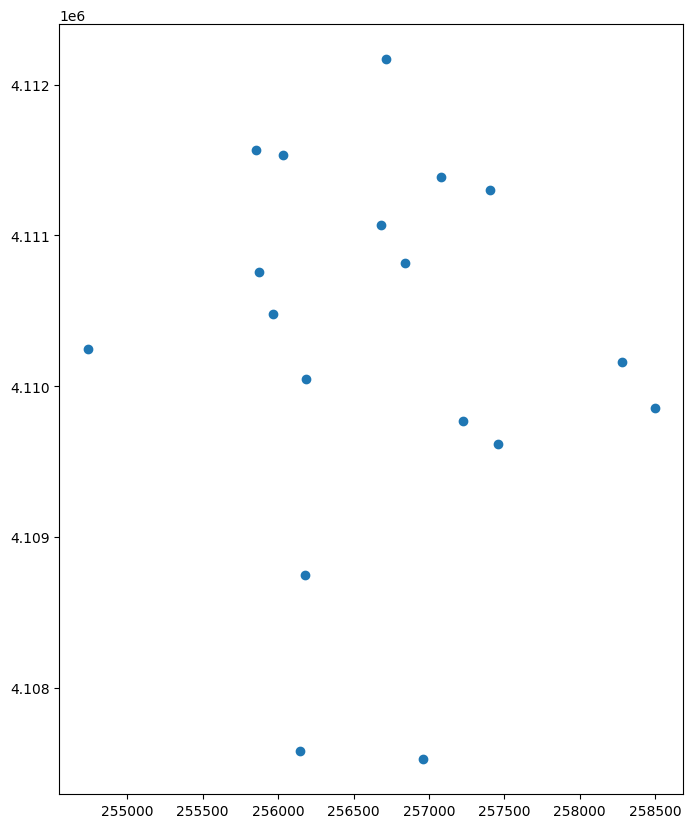

In [15]:
fig, ax = plt.subplots(figsize=(10, 10))

sjer_plot_locations.plot(ax=ax)

plt.show()

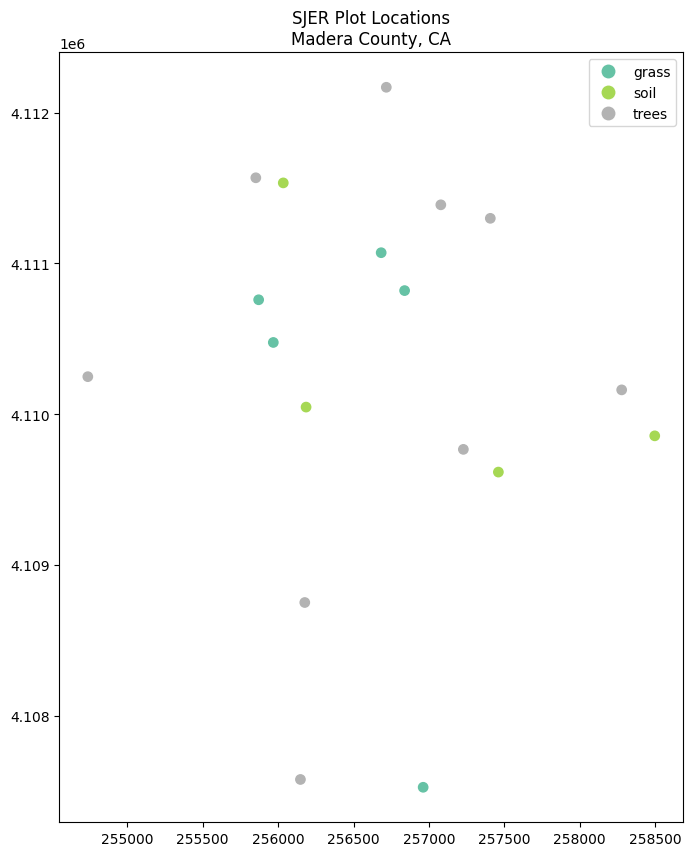

In [16]:
fig, ax = plt.subplots(figsize=(10, 10))

sjer_plot_locations.plot(column='plot_type',
                         categorical=True,
                         legend=True,
                         figsize=(10, 6),
                         markersize=45,
                         cmap="Set2",
                         ax=ax)

ax.set_title('SJER Plot Locations\nMadera County, CA')

plt.show()


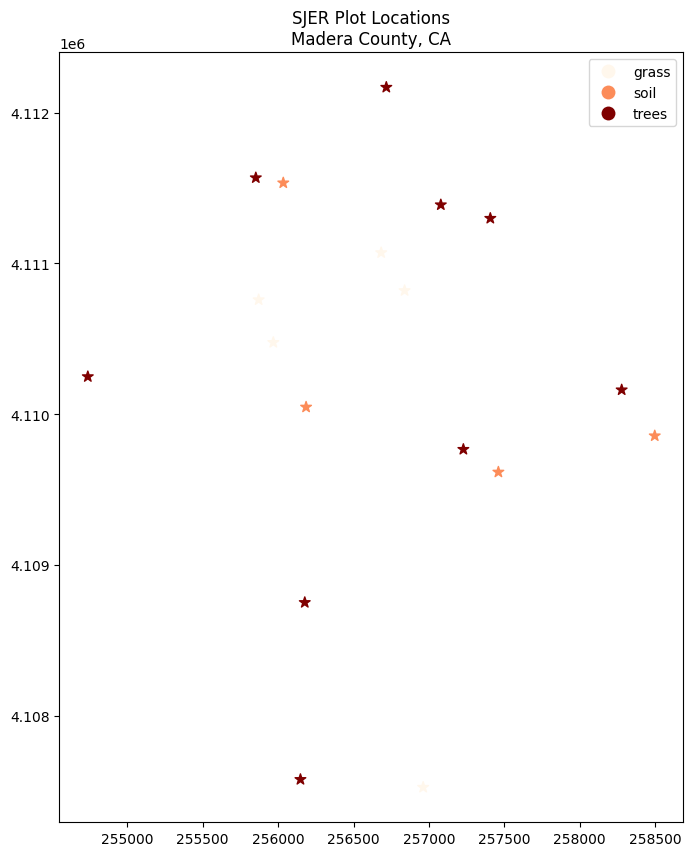

In [17]:
fig, ax = plt.subplots(figsize=(10, 10))

sjer_plot_locations.plot(column='plot_type',
                         categorical=True,
                         legend=True,
                         marker='*',
                         markersize=65,
                         cmap='OrRd', 
                         ax=ax)

ax.set_title('SJER Plot Locations\nMadera County, CA')

plt.show()

In [18]:
sjer_crop_extent_path = os.path.join("data", "spatial-vector-lidar","california", "neon-sjer-site","vector_data", "SJER_crop.shp")

sjer_crop_extent = gpd.read_file(sjer_crop_extent_path)

sjer_crop_extent.head()

Id                                           geometry
0   0  POLYGON ((254570.567 4112361.920, 258867.409 4...

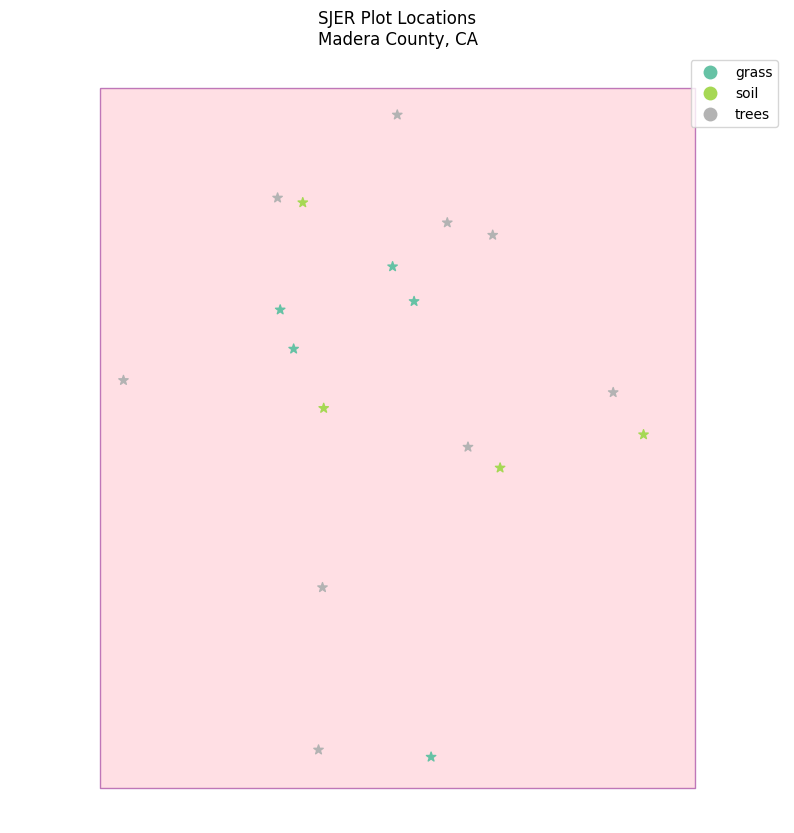

In [19]:
fig, ax = plt.subplots(figsize=(10, 10))

sjer_crop_extent.plot(color='pink',
                      edgecolor='purple',
                      alpha=.5,
                      ax=ax)

sjer_plot_locations.plot(column='plot_type',
                         categorical=True,
                         marker='*',
                         legend=True,
                         markersize=50,
                         cmap='Set2', ax=ax)

ax.set_title('SJER Plot Locations\nMadera County, CA')
ax.set_axis_off()

plt.axis('equal')
plt.show()